## Task 4: To Explore Decision Tree Algorithm.

### For the given 'iris' dataset, create the decision tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.

__Importing Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


__Loading Dataset__

In [2]:
iris = datasets.load_iris()
dt = pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
dt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
dt.shape

(150, 4)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


#### By looking at the data

- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)


In [5]:
dt.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Checking for missing values__

In [6]:
dt.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

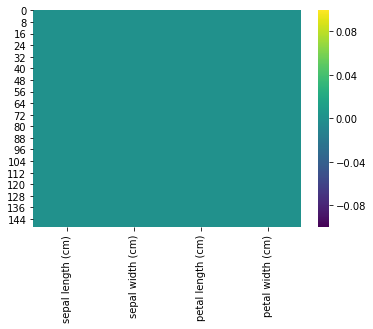

In [7]:
sns.heatmap(dt.isnull(),cmap='viridis',annot= False);

Above figure clearly shows that the dataset does not contain any missing values.

### Exploratory Data Analysis.
__Univariate Analysis__

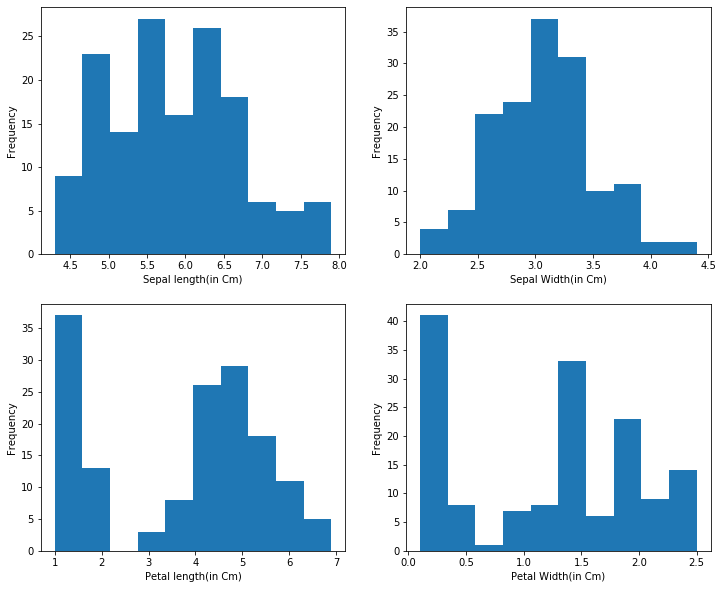

In [11]:
#Numerical
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(dt['sepal length (cm)'])
plt.xlabel('Sepal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(dt['sepal width (cm)'])
plt.xlabel('Sepal Width(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(dt['petal length (cm)'])
plt.xlabel('Petal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(dt['petal width (cm)'])
plt.xlabel('Petal Width(in Cm)')
plt.ylabel('Frequency');

- Most of data has sepal length lies between 4.5 to 6.5

- Most of the data points has sepal width between 2.5 to 3.5

- There are only few data points having petal length between 2-3 and of the data has petal length between 4-5-5.5

- Petal width is not uniformly distributed.

__Bivariate Analysis__

In [13]:
#Numerical
dt.corr(method = 'pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


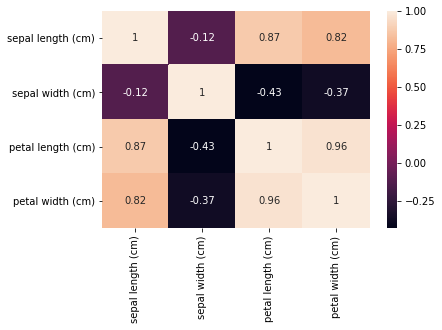

In [14]:
sns.heatmap(dt.corr(method = 'pearson'),annot = True,);

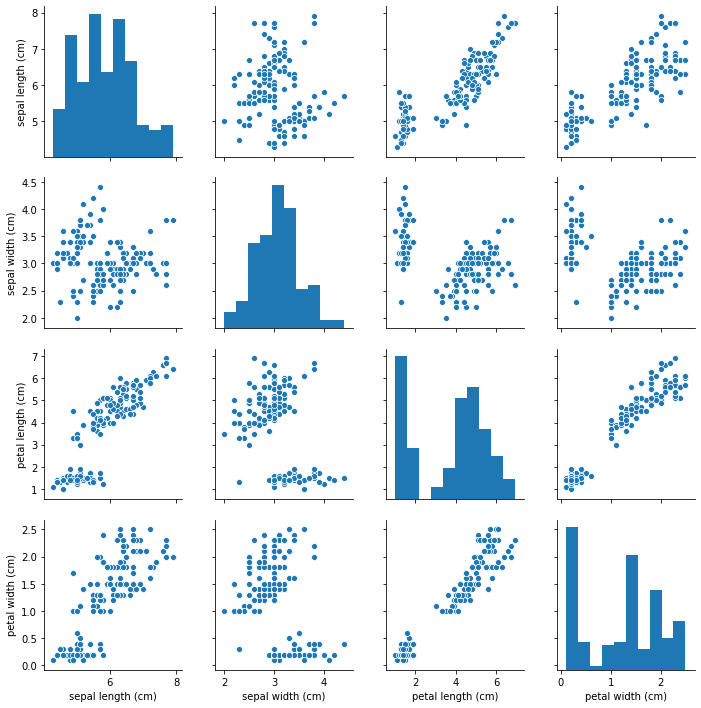

In [15]:
sns.pairplot(dt);

In [16]:
## Import Dataset
def importdata():
    iris = datasets.load_iris()
    dt = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    dt.reset_index(inplace=True)
    ##Printing the dataset shape
    print("Datset Length",len(dt))
    print("Dataset shape",dt.shape)
    print("Dataset:",dt.head())
    return dt

__Spliting the Dependent & Independent variables__

In [17]:
##function to split the dataset
def splitdataset(dt):
    x=dt.values[:,1:4]
    y=dt.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

### Decision Tree classifier

In [18]:
##function to perform training with giniIndex
def train_using_gini(x_train,x_test,y_train):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    #performing training
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [19]:
##Function to perform training with entropy
def train_using_entropy(x_train,x_test,y_train):
    ##decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    
    ##performing training
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [20]:
##function to make predictions
def prediction(x_test,clf_object):
    ##Prediction on test with giniindex
    y_pred=clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [21]:
##Function to calculate accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:",classification_report(y_test,y_pred))

In [22]:
##Driver code
def main():
    #Building phase
    data=importdata()
    x,y,x_train,x_test,y_train,y_test=splitdataset(data)
    clf_gini=train_using_gini(x_train,x_test,y_train)
    clf_entropy=train_using_entropy(x_train,x_test,y_train)
    #operational phase
    print('\n')
    print("Results using Gini Index:")
    
    
    #Prediction using gini
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    
    
    #Prediction using entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    cal_accuracy(y_test,y_pred_entropy)

#Calling main function
if __name__=="__main__":
    main();

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


Results using Gini Index:
Predicted values:
[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91  

###### From above output we can say that
###### For Gini:
**Our accuracy is 0.9555 means our model is 95.55% accurate.**

In precision,High Precision means that false positive rate is low we have got 0.94 precision which is good.

We got recall as 0.94 which is very good for this model as it is the above range of 0.5.

f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.

In our case accuracy score and f1 score not differ much,f1 score is 0.96.

###### For Entropy:
**Our accuracy is 0.9777~=0.98 means our model is 98% accurate.**

In precision,High Precision means that false positive rate is low we have got 0.95 precision which is good.

We got recall as 0.91 which is very good for this model as it is the above range of 0.5.

f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.

In our case accuracy score and f1 score not differ much,f1 score is 0.98.

__Let us visualize the Decision Tree to understand it better.__

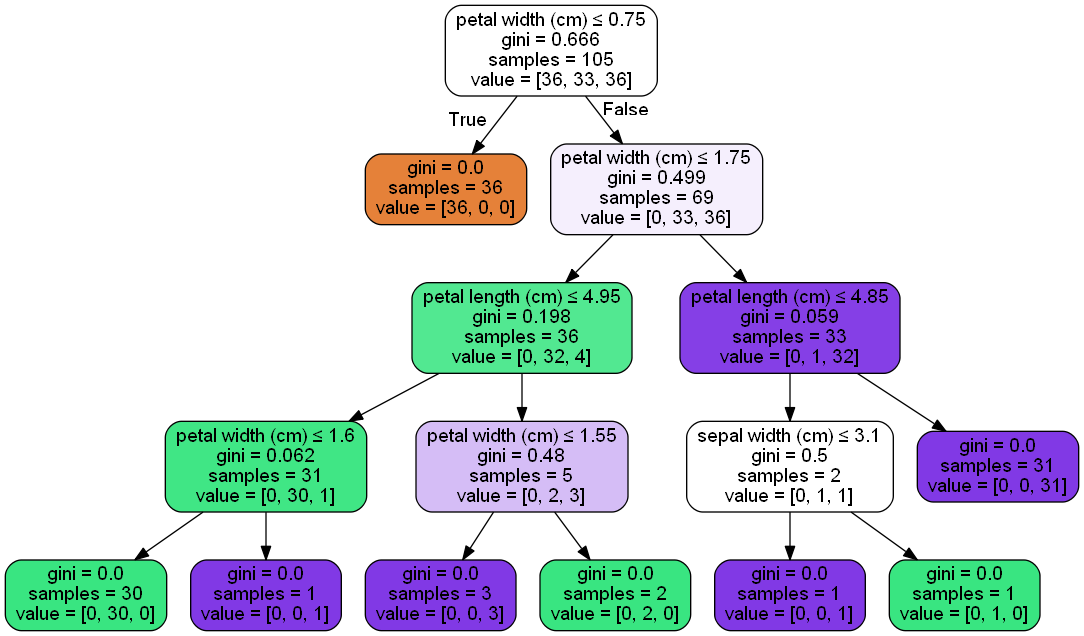

In [23]:
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(dt,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())